Iterated Fit:
 [   7.25350593 1283.27944547    2.0516103 ] 
 [[ 3.20571218e+00  1.89592302e+00 -2.33385187e-02]
 [ 1.89592302e+00  1.21931909e+02 -2.02216843e-01]
 [-2.33385187e-02 -2.02216843e-01  6.48396150e-04]]


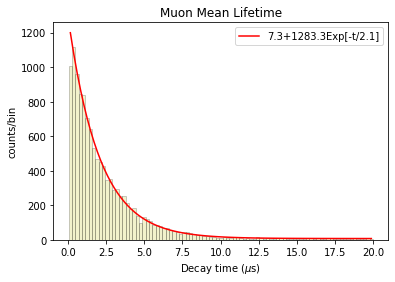

In [2]:
#This cell imports sift.dat, histograms, fits the data with nonlinear model and plots the data and results simply
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
from scipy.optimize import curve_fit

#import the data and scale from ns to micro seconds
data = loadtxt('sift.dat',unpack=True, usecols=[0])/1000

# if using unsifted and un-scaled data
# data = loadtxt('unsifted.dat',unpack=True, usecols=[0])
# data = [x for x in data if x < 39999]

#bin the data .02/1
#binLocs = np.arange(.02,20.02,.02)
y, bins = np.histogram(data, bins = 'auto')
#center bin values for fit
x = (bins[1:]+bins[:-1])/2
#delete bad bins###########
x2 = np.delete(x, [0])
y2 = np.delete(y, [0])

#fit function
def func(x, c, a, b):
    return c + a * np.exp(-x/b)

popt, pcov = curve_fit(func, x2, y2)

print("Iterated Fit:\n",popt,"\n",pcov)
plt.figure()
plt.plot(x, func(x,*popt), 
         label='%1.1f+%1.1fExp[-t/%1.1f]' % (popt[0],popt[1],popt[2]), color='red')
plt.hist(data, len(bins), color = "y", alpha= .2, ec="black")
plt.xlabel('Decay time ($\\mu$s)')
plt.ylabel('counts/bin')
plt.title('Muon Mean Lifetime')
plt.legend(loc=0)
plt.savefig('muonScaled.pdf')
plt.close( 'muonScaled.pdf')

In [3]:
#this is step 13 of the project 40 sets of 50 deacys...
#this cell prints out the mean, variance and std of the 40 "min experiments"
initelement = 0
n_sets = 40
setsize = 50
b = []
for i in range(n_sets):
    count = 0
    for j in range(setsize):
        if data[j+initelement+i*setsize] < popt[2]:
            count += 1
    b.append(count)

# calculate mean
mean = sum(b) / len(b)
# calculate variance using a list comprehension
var_res = sum((xi - mean) ** 2 for xi in b) / (len(b)-1)
sdom = np.sqrt(var_res)
print (mean , var_res, sdom)

28.95 10.715384615384616 3.2734362091515723


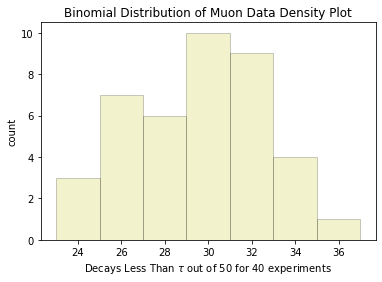

In [4]:
#histogram and plot normalized results simply
label = '$P(x) = N(\\mu =%1.2f,  \\sigma$ = %1.2f)' % (mean, sdom)
xplot = np.linspace(mean-var_res,mean+var_res,1000)

plt.figure()
plt.hist(b, bins='auto', color = "y", alpha= .2, ec="black")

plt.xlabel('Decays Less Than $\\tau$ out of 50 for 40 experiments')
plt.ylabel('count')
plt.title('Binomial Distribution of Muon Data Density Plot')
plt.savefig('muonpy3sc.pdf')
plt.close( 'muonpy3sc.pdf')

In [5]:
#the following cells use fancy plot options that may or may not work
#in addition to many extra tests.

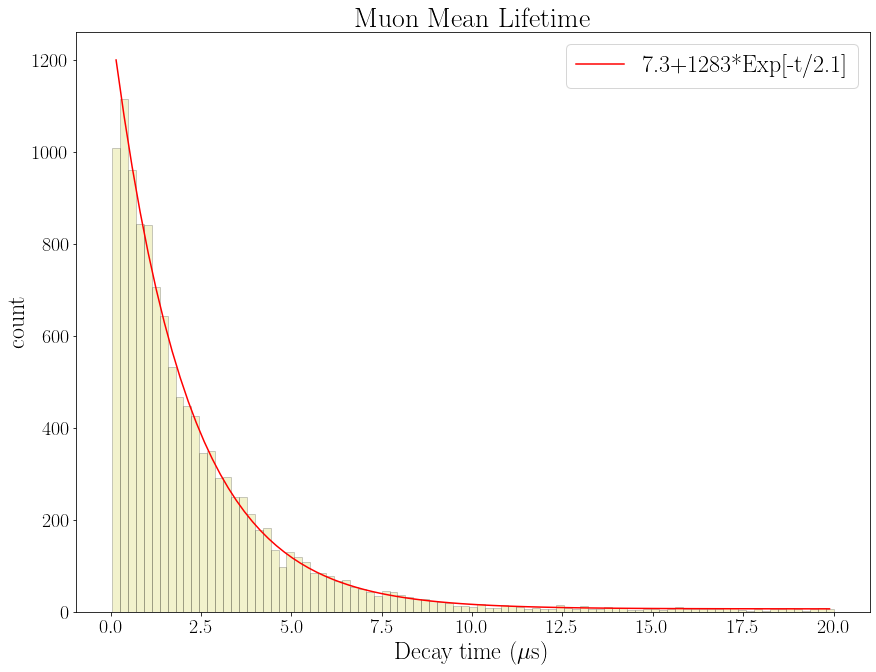

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
from numpy import loadtxt
import matplotlib
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure()
plt.plot(x, func(x,*popt), 
         label='%1.1f+%1.0f*Exp[-t/%1.1f]' % (popt[0],popt[1],popt[2]), color='red')
plt.hist(data, len(bins), color = "y", alpha= .2, ec="black")
plt.xlabel('Decay time ($\\mu$s)', fontsize=24)
plt.ylabel('count', fontsize=24)
plt.title('Muon Mean Lifetime', fontsize=28)
plt.legend(loc=0,prop={'size':24})
fig = plt.gcf()
DPI = fig.get_dpi()
fig.set_size_inches(1024.0/float(DPI),768.0/float(DPI))
plt.savefig('muonPy.pdf')
plt.close( 'muonPy.pdf')

Iterated Fit:
 [1.10168621e+00 1.17320753e+02 2.00964518e+03] 
 [[ 2.33351214e-02  1.01995719e-02 -1.76431002e+00]
 [ 1.01995719e-02  8.17604569e-01 -1.44736951e+01]
 [-1.76431002e+00 -1.44736951e+01  5.24892798e+02]]
Weighted Lsq Fit:
 86.26088870640376 3176.847983111082
Lsq Fit:
 32.97822554296715 4456.6173002543
The estimated Background 0.7


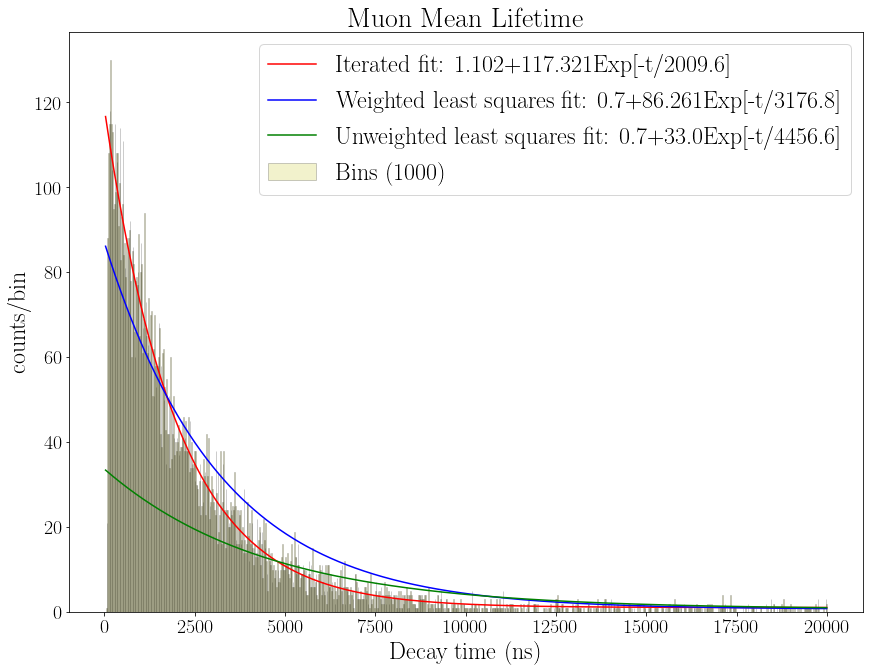

In [7]:
#This cell imports sift.dat, histograms, fits the data with nonlinear model, weighted least squares and least squares and plots the data and results with fancy options such as font type and sizes
#From here on out the cells depend on each other need to make sure you are imorting sift or unsifted
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
from numpy import loadtxt
import matplotlib
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def exponentialfit(x, y):
    for i in range(len(y)):
        if y[i] == 0:
            y[i] = 1
    n = len(x)
    sxlny = sum(x*np.log(y))
    slny = sum(np.log(y))
    sx2 = sum(x**2)
    sx = sum(x)
    return np.exp((slny*sx2 - sx*sxlny)/(n*sx2 - sx**2)),\
            (n*sxlny - sx*slny)/(n*sx2 - sx**2)

def exponentialweightedfit(x, y):
    for i in range(len(y)):
        if y[i] == 0:
            y[i] = 1
    n = len(x)
    sxlny = sum(x*np.log(y))
    sx2y = sum((x**2)*y)
    sxy = sum(x*y)
    slny = sum(np.log(y))
    sx2 = sum(x**2)
    sx = sum(x)
    sy = sum(y)
    sylny = sum(y*np.log(y))
    sxylny = sum(x*y*np.log(y))
    return np.exp((sx2y*sylny - sxy*sxylny)/(sy*sx2y-sxy**2)),\
                   (-(sxy*sylny)+sy*sxylny)/(sy*sx2y - (sxy**2));

#data = loadtxt('sift.dat',unpack=True, usecols=[0])
#data = [x for x in data if x < 39999]
data = data*1000
binsc = np.arange(20,20020,20)
y, bins = np.histogram(data, bins = binsc)
x = (bins[1:]+bins[:-1])/2
x2 = np.delete(x, [0,1,2,3,4,5,6,7,8])#delete bad bins###########
y2 = np.delete(y, [0,1,2,3,4,5,6,7,8])
        
#calc background
num = 30
cc = 0.0
for j in range(len(y2)-num,len(y2)):
    cc = cc + y2[j]
cc = cc/num

a = exponentialfit(x2,y2)
b = exponentialweightedfit(x2,y2)

#iterated
def func(x, c, a, b):
    return c + a * np.exp(-x/b)

init_vals = [cc, b[0], -1/b[1]] 
popt, pcov = curve_fit(func, x2, y2, p0=init_vals)

print("Iterated Fit:\n",popt,"\n",pcov)
print("Weighted Lsq Fit:\n",b[0],-1/b[1])
print("Lsq Fit:\n",a[0],-1/a[1])
print("The estimated Background",cc)

plt.figure()
plt.plot(x, func(x,*popt), 
         label='Iterated fit: %1.3f+%1.3fExp[-t/%1.1f]' % (popt[0],popt[1],popt[2]), color='red')
plt.plot(x,func(x,cc,b[0],-1/b[1]), color='blue',
         label='Weighted least squares fit: %1.1f+%1.3fExp[-t/%1.1f]' % (cc,b[0],-1/b[1]))
plt.plot(x,func(x,cc,a[0],-1/a[1]), color='green',
         label='Unweighted least squares fit: %1.1f+%1.1fExp[-t/%1.1f]' % (cc,a[0],-1/a[1]))
plt.hist(data, len(binsc), color = "y", alpha= .2, ec="black",label='Bins (%i)' % len(binsc))
plt.xlabel('Decay time (ns)', fontsize=24)
plt.ylabel('counts/bin', fontsize=24)
plt.title('Muon Mean Lifetime', fontsize=28)
plt.legend(loc=0,prop={'size':24})
fig = plt.gcf()
DPI = fig.get_dpi()
fig.set_size_inches(1024.0/float(DPI),768.0/float(DPI))
plt.savefig('muonPy3.pdf')
plt.close( 'muonPy3.pdf')

1.9992700828197485e-09 -1771.575352458215 3432.5759867394277


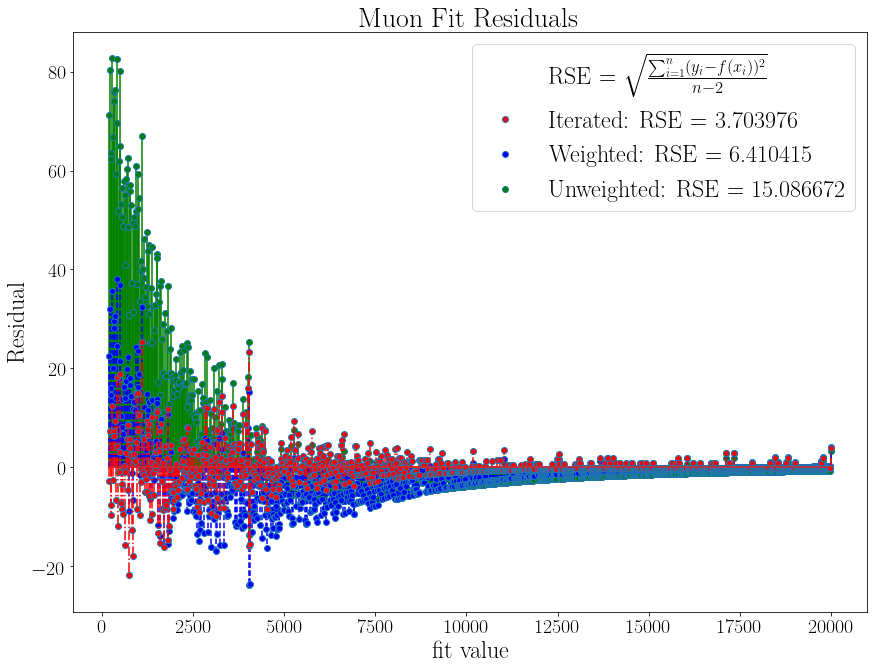

In [8]:
#this cell calculates and plots the residuals it takes a minute
y3 = y2-(popt[0]+popt[1]*np.exp(-x2/popt[2]))
y4 = y2-(cc+b[0]*np.exp(b[1]*x2))
y5 = y2-(cc+cc+a[0]*np.exp(a[1]*x2))
print(sum(y3),sum(y4),sum(y5))
rsenlm = np.sqrt(sum(y3**2)/(len(y2) - 2))
rsewlsq = np.sqrt(sum(y4**2)/(len(y2) - 2))
rselsq = np.sqrt(sum(y5**2)/(len(y2) - 2))


fig, ax = plt.subplots()
markerline2, stemlines, _ = plt.stem(x2, y5, '-', linefmt='g')
h1 = plt.setp(markerline2, 'markerfacecolor', 'g', label='Unweighted: RSE = %f' % rselsq)
markerline2, stemlines, _ = plt.stem(x2, y4,linefmt='--b')
h2 = plt.setp(markerline2, 'markerfacecolor', 'b', label='Weighted: RSE = %f' % rsewlsq)

markerline1, stemlines, _ = plt.stem(x2, y3, linefmt= '-.''r')
h3 = plt.setp(markerline1, 'markerfacecolor','r', label='Iterated: RSE = %f' % rsenlm)
h4 = plt.plot([], [], ' ', label="RSE = $\\sqrt{\\frac{\\sum^n_{i=1}(y_i-f(x_i))^2}{n-2}}$")

plt.xlabel('fit value', fontsize=24)
plt.ylabel('Residual', fontsize=24)
plt.title('Muon Fit Residuals', fontsize=28)

handles, labels = ax.get_legend_handles_labels()
plt.legend([handles[3],handles[2],handles[1],handles[0]], 
           [labels[3],labels[2],labels[1],labels[0]],
           loc=0,prop={'size':24})
fig = plt.gcf()
DPI = fig.get_dpi()
fig.set_size_inches(1024.0/float(DPI),768.0/float(DPI))
plt.savefig('muonpyres.pdf')
plt.close( 'muonpyres.pdf')

In [9]:
#cell of functions to plot histogram determine normality and distribution 
import scipy.stats as st
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

def plotHistogramResid(data, bins, fitType, fileName):
    plt.figure()
    plt.hist(data, bins, color = "y", alpha= .2, ec="black")
    plt.xlabel('residual', fontsize=24)
    plt.ylabel('counts', fontsize=24)
    plt.title(fitType + ' Fit Residuals Bins', fontsize=28)
    # plt.legend(loc=0,prop={'size':24})
    fig = plt.gcf()
    DPI = fig.get_dpi()
    fig.set_size_inches(1024.0/float(DPI),768.0/float(DPI))
    plt.savefig(fileName)
    plt.close(fileName)

def get_normal_tests(data):
    # https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
    # normality test
    stat, p = shapiro(data)
    print('Shapiro Wilk test Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Shapiro Wilk test: Sample looks Gaussian (fail to reject H0)')
    else:
        print('Shapiro Wilk test: Sample does not look Gaussian (reject H0)')

    stat, p = normaltest(data)
    print('D\'Agostino and Pearson\'s Test Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('D\'Agostino and Pearson\'s: Test: Sample looks Gaussian (fail to reject H0)')
    else:
        print('D\'Agostino and Pearson\'s: TestSample does not look Gaussian (reject H0)')

    result = anderson(data)
    print('Anderson Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('Anderson: %.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('Anderson: %.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    

def get_best_distribution(data):#https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))
    return best_dist, best_p, params[best_dist]
    
def qqPlot(data, title, fileName):
    qqplot(data, line='s')
    pyplot.title(title)
    plt.savefig(fileName)
    plt.close(fileName)
    pyplot.show()


Shapiro Wilk test Statistics=0.337, p=0.000
Shapiro Wilk test: Sample does not look Gaussian (reject H0)
D'Agostino and Pearson's Test Statistics=79.581, p=0.000
D'Agostino and Pearson's: TestSample does not look Gaussian (reject H0)
Anderson Statistic: 9.672
Anderson: 15.000: 0.531, data does not look normal (reject H0)
Anderson: 10.000: 0.605, data does not look normal (reject H0)
Anderson: 5.000: 0.726, data does not look normal (reject H0)
Anderson: 2.500: 0.847, data does not look normal (reject H0)
Anderson: 1.000: 1.007, data does not look normal (reject H0)
p value for norm = 1.9268516793660704e-05
p value for exponweib = 1.09046129879141e-08
p value for weibull_max = 6.3918949625108344e-06
p value for weibull_min = 0.012987018004791184
p value for pareto = 0.013635007517179993
p value for genextreme = 0.0404159919247983
Best fitting distribution: genextreme
Best p value: 0.0404159919247983
Parameters for the best fit: (-0.42621782644470624, 0.0027535587977693685, 0.00369463909

('genextreme',
 0.0404159919247983,
 (-0.42621782644470624, 0.0027535587977693685, 0.00369463909440124))

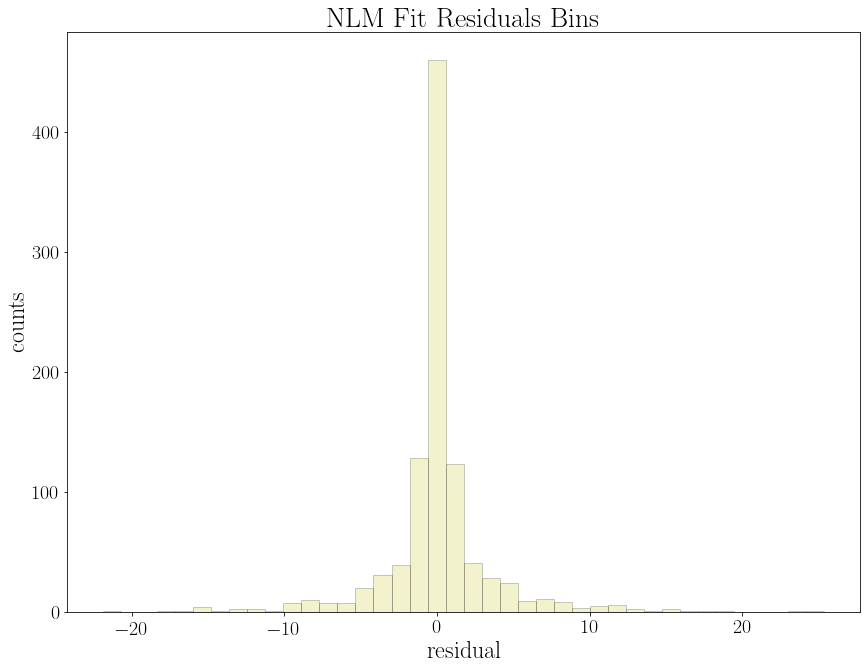

In [10]:
#histogram nlm fit residuals and look at normal tests and check "best fit"
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
binNLM = 40
yNLM, bins = np.histogram(y3, bins =binNLM)
total = 0
for i in yNLM:
    total += i

plotHistogramResid(y3,binNLM, "NLM", "nlmFitResidHist.pdf")
get_normal_tests(yNLM/total)
get_best_distribution(yNLM/total)

Shapiro Wilk test Statistics=0.463, p=0.000
Shapiro Wilk test: Sample does not look Gaussian (reject H0)
D'Agostino and Pearson's Test Statistics=61.228, p=0.000
D'Agostino and Pearson's: TestSample does not look Gaussian (reject H0)
Anderson Statistic: 8.045
Anderson: 15.000: 0.531, data does not look normal (reject H0)
Anderson: 10.000: 0.605, data does not look normal (reject H0)
Anderson: 5.000: 0.726, data does not look normal (reject H0)
Anderson: 2.500: 0.847, data does not look normal (reject H0)
Anderson: 1.000: 1.007, data does not look normal (reject H0)
p value for norm = 2.1853065801643884e-05
p value for exponweib = 0.13294521312179114
p value for weibull_max = 7.01664622621385e-05
p value for weibull_min = 0.0773388365800931
p value for pareto = 0.4044349899792105
p value for genextreme = 0.3400186874353482
Best fitting distribution: pareto
Best p value: 0.4044349899792105
Parameters for the best fit: (0.7438562629391368, -0.002431071663871697, 0.002431071077718186)


('pareto',
 0.4044349899792105,
 (0.7438562629391368, -0.002431071663871697, 0.002431071077718186))

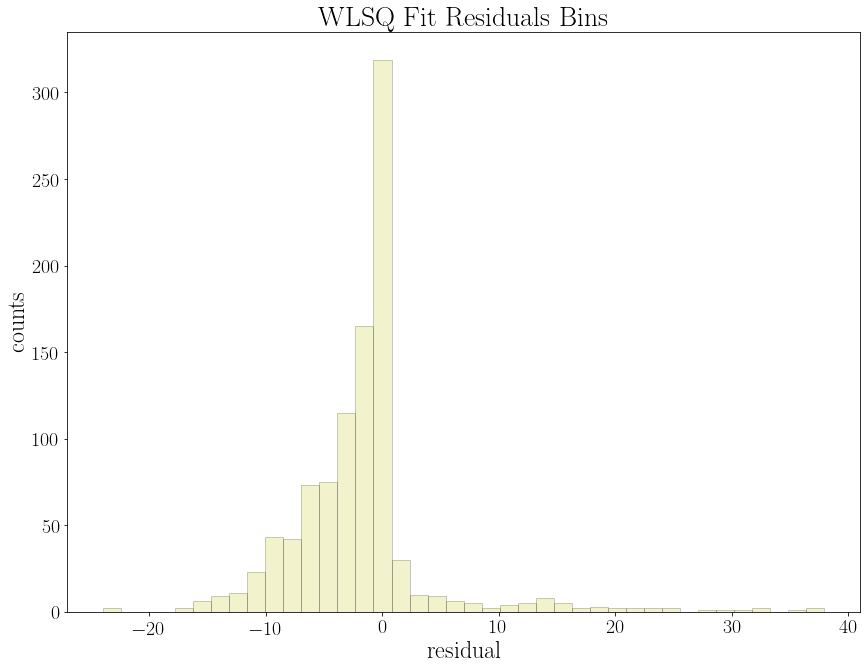

In [11]:
#histogram wlsq fit residuals and look at normal tests and check "best fit"
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
binWLsq = 40
yLsq, bins = np.histogram(y4, bins =binWLsq)
total = 0
for i in yNLM:
    total += i

plotHistogramResid(y4, binWLsq, "WLSQ", "wlsqFitResidHist.pdf")
get_normal_tests(yLsq/total)
get_best_distribution(yLsq/total)

Shapiro Wilk test Statistics=0.336, p=0.000
Shapiro Wilk test: Sample does not look Gaussian (reject H0)
D'Agostino and Pearson's Test Statistics=63.371, p=0.000
D'Agostino and Pearson's: TestSample does not look Gaussian (reject H0)
Anderson Statistic: 11.099
Anderson: 15.000: 0.531, data does not look normal (reject H0)
Anderson: 10.000: 0.605, data does not look normal (reject H0)
Anderson: 5.000: 0.726, data does not look normal (reject H0)
Anderson: 2.500: 0.847, data does not look normal (reject H0)
Anderson: 1.000: 1.007, data does not look normal (reject H0)
p value for norm = 4.0800441924940344e-07
p value for exponweib = 3.182563602172892e-05
p value for weibull_max = 1.1455573558003883e-05
p value for weibull_min = 0.015728174039654992
p value for pareto = 0.23107817871268016
p value for genextreme = 0.39539960202372243
Best fitting distribution: genextreme
Best p value: 0.39539960202372243
Parameters for the best fit: (-0.5796546629873378, 0.003534205915004371, 0.0033644537

('genextreme',
 0.39539960202372243,
 (-0.5796546629873378, 0.003534205915004371, 0.003364453726562696))

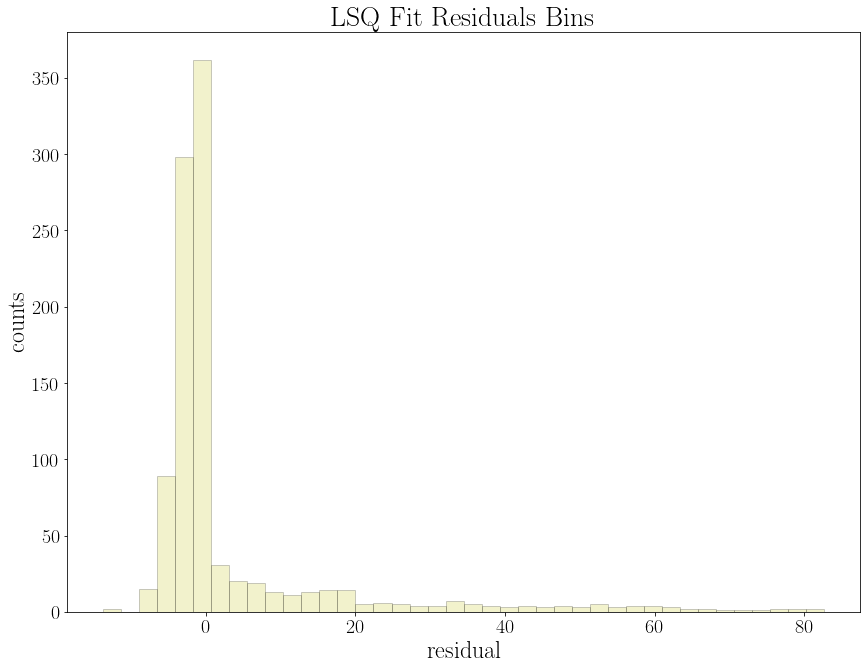

In [12]:
#histogram lsq fit residuals and look at normal tests and check "best fit"
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
binLsq = 40
yLsq, bins = np.histogram(y5, bins =binLsq)
total = 0
for i in yNLM:
    total += i

plotHistogramResid(y5, binLsq, "LSQ", "lsqFitResidHist.pdf")
get_normal_tests(yLsq/total)
get_best_distribution(yLsq/total)

In [13]:
#this is step 13 of the project 40 sets of 50 deacys...
#this cell prints out the mean, variance and std of the 40 "min experiments"
initelement = 0
n_sets = 40
setsize = 50
b = []
for i in range(n_sets):
    count = 0
    for j in range(setsize):
        if data[j+initelement+i*setsize] < popt[2]:
            count += 1
    b.append(count)
y, bins = np.histogram(b, bins = binsc)


# calculate mean
mean = sum(b) / len(b)
# calculate variance using a list comprehension
var_res = sum((xi - mean) ** 2 for xi in b) / (len(b)-1)
sdom = np.sqrt(var_res)
print (mean , var_res, sdom)

28.675 11.199358974358974 3.346544333242722


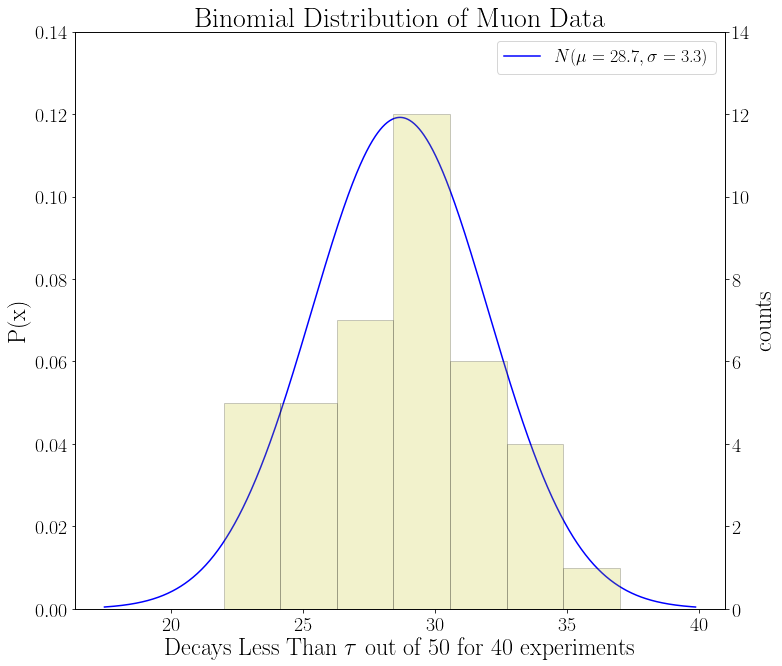

In [14]:
#histogram and plot normalized results
import numpy as np
import matplotlib.pyplot as plt
# label = '$P(x) = \\frac{1}{{\\sigma \\sqrt {2\\pi } }}e^{{{ - \\left( {x - \\mu } \\right)^2 } \\mathord{\\left/ {\\vphantom {{ - \\left( {x - \\mu } \\right)^2 } {2\\sigma ^2 }}} \\right. \\kern-\\nulldelimiterspace} {2\\sigma ^2 }}}$'
label = '$N(\\mu =%1.1f,  \\sigma$ = %1.1f)' % (mean, sdom)

xplot = np.linspace(mean-var_res,mean+var_res,1000)

fig, ax1 = plt.subplots()

color = 'black'
ax1.set_xlabel('Decays Less Than $\\tau$ out of 50 for 40 experiments', fontsize=24)
ax1.set_ylabel('P(x)', color=color, fontsize=24)
ax1.plot(xplot,(1/(sdom*np.sqrt(2.0*np.pi)))*np.exp(-(((xplot-mean)*(xplot-mean))/(2.0*var_res))), 
         color='blue',label=label)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.legend(loc=1,prop={'size':20})
ax1.axis(ymin=0.0,ymax=.14)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('counts', color=color, fontsize=24)  # we already handled the x-label with ax1
ax2.hist(b, bins='auto',color = "y", alpha= .2, ec="black")
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes, prop={'size':18})
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.axis(ymin=0.0,ymax=14)
plt.title('Binomial Distribution of Muon Data', fontsize=28)
fig = plt.gcf()
DPI = fig.get_dpi()
fig.set_size_inches(1024.0/float(DPI),768.0/float(DPI))
plt.savefig('muonpy2.pdf')
plt.close( 'muonpy2.pdf')
plt.show()

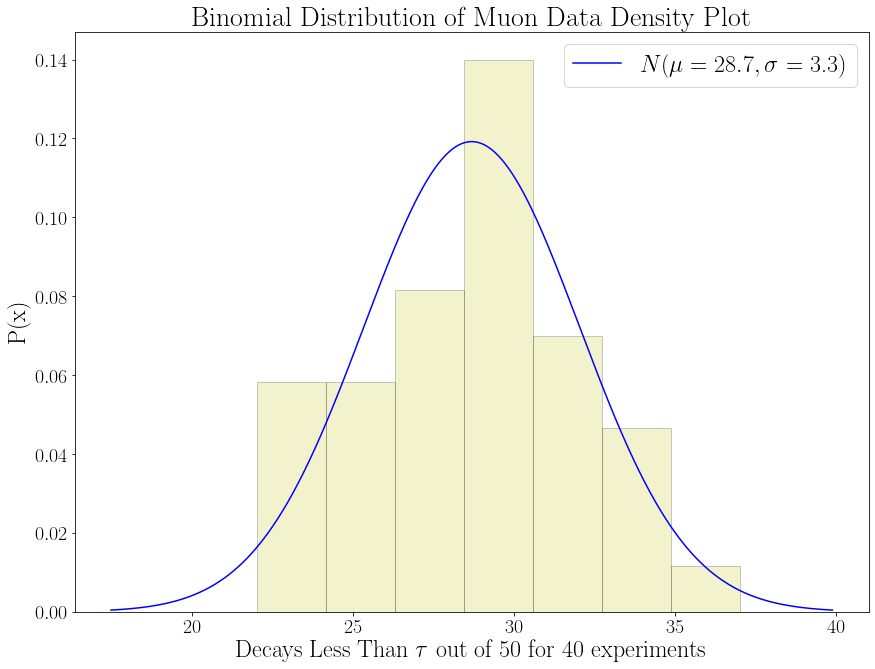

In [15]:
#histogram and plot normalized results
import numpy as np
import matplotlib.pyplot as plt
label = '$N(\\mu =%1.1f,  \\sigma$ = %1.1f)' % (mean, sdom)
xplot = np.linspace(mean-var_res,mean+var_res,1000)

plt.figure()
plt.plot(xplot,(1/(sdom*np.sqrt(2.0*np.pi)))
         *np.exp(-(((xplot-mean)*(xplot-mean))/(2.0*var_res))), 
         color='blue',label=label)
plt.hist(b, bins='auto',density = True, color = "y", alpha= .2, ec="black")

plt.xlabel('Decays Less Than $\\tau$ out of 50 for 40 experiments', fontsize=24)
plt.ylabel('P(x)', fontsize=24)
plt.title('Binomial Distribution of Muon Data Density Plot', fontsize=28)
plt.legend(loc=0,prop={'size':24})
fig = plt.gcf()
DPI = fig.get_dpi()
fig.set_size_inches(1024.0/float(DPI),768.0/float(DPI))
plt.savefig('muonpy3.pdf')
plt.close( 'muonpy3.pdf')

In [16]:
#test data for normalcy 
get_normal_tests(b)
get_best_distribution(b)

Shapiro Wilk test Statistics=0.983, p=0.807
Shapiro Wilk test: Sample looks Gaussian (fail to reject H0)
D'Agostino and Pearson's Test Statistics=0.048, p=0.976
D'Agostino and Pearson's: Test: Sample looks Gaussian (fail to reject H0)
Anderson Statistic: 0.280
Anderson: 15.000: 0.531, data looks normal (fail to reject H0)
Anderson: 10.000: 0.605, data looks normal (fail to reject H0)
Anderson: 5.000: 0.726, data looks normal (fail to reject H0)
Anderson: 2.500: 0.847, data looks normal (fail to reject H0)
Anderson: 1.000: 1.007, data looks normal (fail to reject H0)
p value for norm = 0.6550028237346263
p value for exponweib = 0.49722001925523723
p value for weibull_max = 2.738430563353343e-21
p value for weibull_min = 5.506495398533805e-17
p value for pareto = 0.0012374257907646247
p value for genextreme = 0.5590919525369594
Best fitting distribution: norm
Best p value: 0.6550028237346263
Parameters for the best fit: (28.675, 3.3044477602165236)


('norm', 0.6550028237346263, (28.675, 3.3044477602165236))

In [17]:
# is that the Central Limit Theorem?

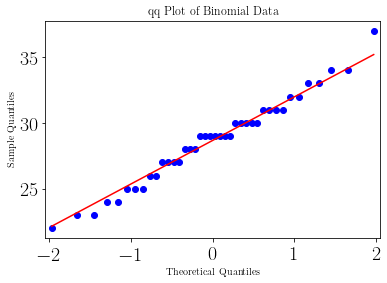

In [18]:
b = np.array(b)
qqPlot(b, "qq Plot of Binomial Data", "muonbinqq.pdf")